# London Crime Statistics Financial Year 2022/23 Exploratory Data Analysis

This project will perform Exploratory Data Analysis **(EDA)** on MPS Crime Statistics Financial Year 2022/23

The original dataset can be downloaded at the _[met.police.uk](https://data.london.gov.uk/dataset/mps-crime-statistics-financial-year-2022-23) website._
 
   





***

In 2018, the **Metropolitan Police Service** _**(MPS)**_ announced plans to replace its 32 borough model by condensing them into 12 **Basic Command Units** _**(BCUs)**_ to save £325m by 2021/22, or to put it in another fashion, due to police funding cuts. 

Here is a list of the 12 BCU merges:<br>

- Central West BCU *(AW)*: Hammersmith and Fulham, Kensington and Chelsea, Westminster<br>

- South West BCU *(SW)*: Kingston, Merton, Richmond, Wandsworth<br>
- South BCU *(SN)*: Bromley, Croydon, Sutton<br>
- South East BCU *(SE)*: Bexley, Greenwich, Lewisham<br>
- East BCU *(EA)*: Barking and Dagenham, Havering, Redbridge<br>
- West BCU *(WA)*: Ealing, Hillingdon, Hounslow<br>
- Central South BCU *(AS)*: Lambeth, Southwark<br>
- North BCU *(NA)*: Enfield, Haringey<br>
- Central East BCU: Hackney, Tower Hamlets<br>
- Central North BCU *(CN)*: Camden, Islington<br>
- North West BCU *(NW)*: Barnet, Brent, Harrow<br>
- North East BCU *(NE)*: Newham, Waltham Forest<br>



_For more information about the MET and its BCU changes, visit [bbc.co.uk](https://www.bbc.co.uk/news/uk-england-london-43033510#:~:text=The%20Metropolitan%20Police%20says%20it,of%20two%20or%20three%20boroughs.)_

## Questions

1. Which London boroughs and/or investigated the most number of crimes?
2. What are the total number of reported crimes in London per year?
3. What are the most reported types of criminal offences?
4. What are the general trends in crime statistics from FY2022/23?

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Prepping Data

In [149]:
#Reading data & getting top 5 rows
data = pd.read_csv("/Users/juanitanelson-addy/OneDrive/VS CODE/CODING PROJECTS/datasets/crimestats-2022-23.csv")

data.head()

,Month-Year,Type,Crime Section,Crime Group,BCU Name,OCU Name,Financial Year,DateUpTo,Count
0,2017-04-01,Offences,Miscellaneous Crimes Against Society,Other Forgery,Central North BCU,Islington,fy17-18,2023-03-01,3
1,2017-04-01,Sanction Detections,Miscellaneous Crimes Against Society,Perverting Course of Justice,Central West BCU,Hammersmith & Fulham,fy17-18,2023-03-01,3
2,2017-04-01,Sanction Detections,Arson and Criminal Damage,Arson,West BCU,Hillingdon,fy17-18,2023-03-01,1
3,2017-04-01,Offences,Theft,Shoplifting,West BCU,Ealing,fy17-18,2023-03-01,128
4,2017-04-01,Offences,Robbery,Robbery of Personal Property,South East BCU,Lewisham,fy17-18,2023-03-01,47


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142756 entries, 0 to 142755
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Month-Year      142756 non-null  object
 1   Type            142756 non-null  object
 2   Crime Section   142756 non-null  object
 3   Crime Group     142756 non-null  object
 4   BCU Name        142756 non-null  object
 5   OCU Name        142756 non-null  object
 6   Financial Year  142756 non-null  object
 7   DateUpTo        142756 non-null  object
 8   Count           142756 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 9.8+ MB


In [151]:
pd.DataFrame(data.isnull().sum(), columns= ["Missing Values"])

,Missing Values
Month-Year,0
Type,0
Crime Section,0
Crime Group,0
BCU Name,0
OCU Name,0
Financial Year,0
DateUpTo,0
Count,0


Now that we have imported, explored and prepped the data, we can now start to look to answering our questions!




### Finding out which London boroughs have investigated the most crimes

Firstly, we will focus on the data that concerns the top boroughs (OCUs), then look at the recently-condensed areas (BCUs) and discuss our findings.


In [152]:
# Counting no. of times a borough appears
top_boroughs = pd.Series(data["OCU Name"]).value_counts()
top_boroughs

OCU Name
Lambeth                 4913
Westminster             4889
Newham                  4876
Tower Hamlets           4819
Greenwich               4698
Croydon                 4685
Brent                   4653
Enfield                 4642
Hackney                 4637
Southwark               4620
Haringey                4584
Ealing                  4573
Islington               4572
Hounslow                4568
Wandsworth              4568
Lewisham                4546
Barnet                  4473
Camden                  4426
Waltham Forest          4400
Hammersmith & Fulham    4377
Hillingdon              4349
Redbridge               4316
Barking & Dagenham      4253
Bromley                 4189
Kensington & Chelsea    4103
Havering                4067
Harrow                  3939
Merton                  3934
Bexley                  3882
Sutton                  3716
Kingston upon Thames    3696
Richmond upon Thames    3506
Aviation Policing       2287
Name: count, dtype: int64

In [153]:
#Grabbing Top 10 boroughs
top_boroughs.head(10)

OCU Name
Lambeth          4913
Westminster      4889
Newham           4876
Tower Hamlets    4819
Greenwich        4698
Croydon          4685
Brent            4653
Enfield          4642
Hackney          4637
Southwark        4620
Name: count, dtype: int64

In [154]:
#New DF for borough counts
top_boroughs_counts = data["OCU Name"].value_counts().head(10)
top_boroughs_df = top_boroughs_counts.reset_index()
top_boroughs_df.columns = ["OCU Name", "Count"]
top_boroughs_df

,OCU Name,Count
0,Lambeth,4913
1,Westminster,4889
2,Newham,4876
3,Tower Hamlets,4819
4,Greenwich,4698
5,Croydon,4685
6,Brent,4653
7,Enfield,4642
8,Hackney,4637
9,Southwark,4620


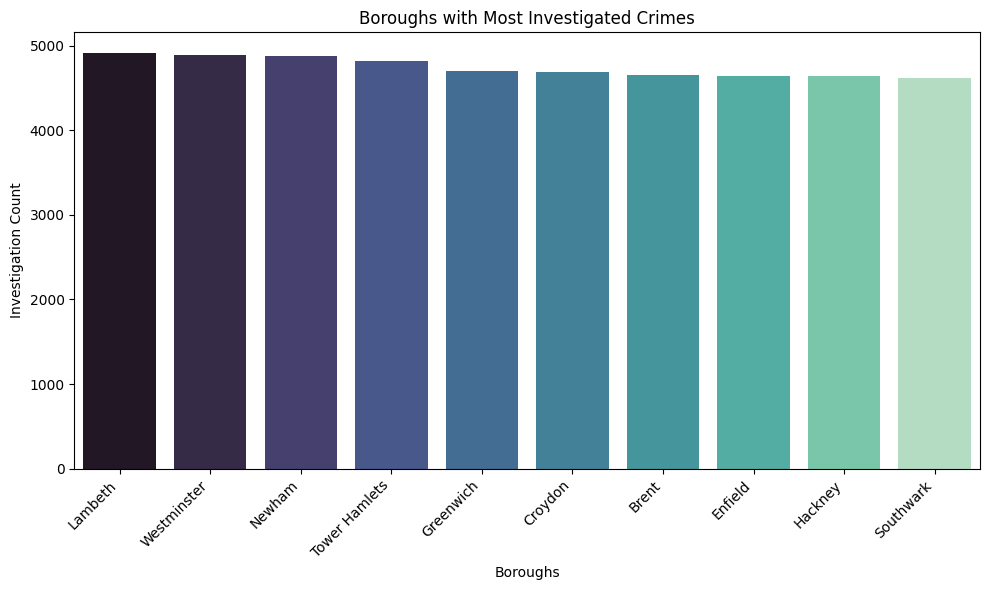

In [155]:
#Visualise top borough data
plt.figure(figsize=(10,6))
sns.barplot(data=top_boroughs_df, x = "OCU Name", y = "Count", hue = "OCU Name", palette="mako", dodge=False)
plt.title("Boroughs with Most Investigated Crimes")
plt.xlabel("Boroughs")
plt.ylabel("Investigation Count")
plt.xticks(rotation=45, ha='right')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

In [156]:
#Is there a trend in which areas of London have the most crimes reported?
top_areas = pd.Series(data["BCU Name"]).value_counts()
top_areas

BCU Name
South West BCU           15704
West BCU                 13490
Central West BCU         13369
South East BCU           13126
North West BCU           13065
East BCU                 12636
South BCU                12590
Central South BCU         9533
Central East BCU          9456
North East BCU            9276
North BCU                 9226
Central North BCU         8998
Aviation Policing BCU     2287
Name: count, dtype: int64

In [157]:
top_areas.head()

BCU Name
South West BCU      15704
West BCU            13490
Central West BCU    13369
South East BCU      13126
North West BCU      13065
Name: count, dtype: int64

In [158]:
#New DF for borough counts
top_areas_counts = data["BCU Name"].value_counts().head()
top_areas_df = top_areas_counts.reset_index()
top_areas_df.columns = ["BCU Name", "Count"]
top_areas_df

,BCU Name,Count
0,South West BCU,15704
1,West BCU,13490
2,Central West BCU,13369
3,South East BCU,13126
4,North West BCU,13065


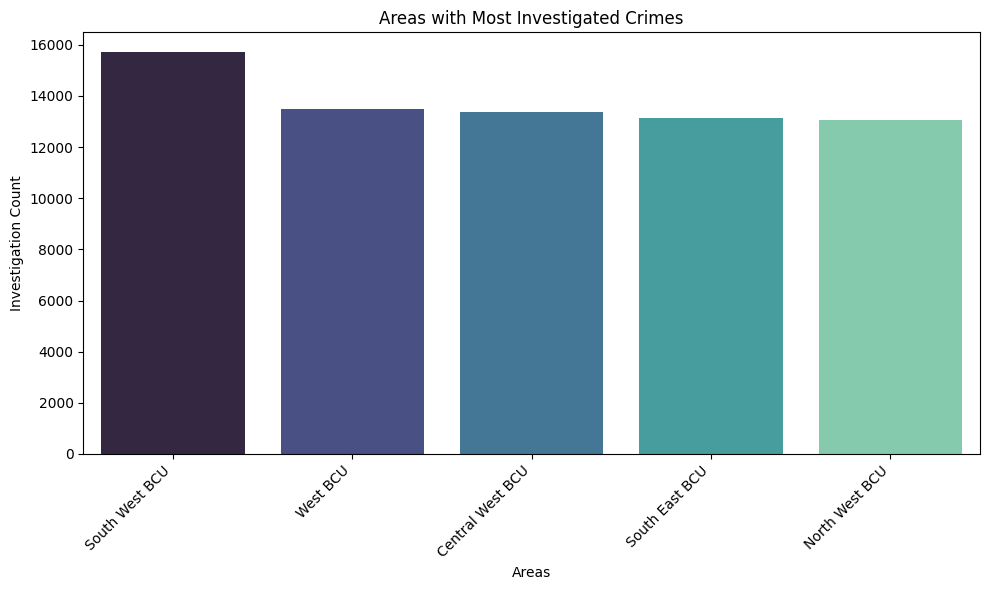

In [159]:
#Visualise data
plt.figure(figsize=(10,6))
sns.barplot(data=top_areas_df, x = "BCU Name", y = "Count", hue = "BCU Name", palette="mako", dodge=False)
plt.title("Areas with Most Investigated Crimes")
plt.xlabel("Areas")
plt.ylabel("Investigation Count")
plt.xticks(rotation=45, ha='right')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


Findings: The OCU (or borough) that had investigated the most crimes in the given period was Lambeth




# Results Summary

##### Question 1: Which London boroughs and/or areas investigated the most number of crimes?
**BOROUGHS**

Lambeth _(4913)_

Westminster _(4889)_

Newham _(4876)_

Tower Hamlets _(4819)_

Greenwich (_4698)_

Croydon _(4685)_

Brent _(4653)_

Enfield _(4642)_

Hackney _(4637)_

Southwark _(4620)_

**AREAS**

South West BCU _(15704)_

West BCU _(13490)_

Central West BCU _(13369)_

South East BCU _(13126)_

North West BCU _(13065)_
